# Part B: Quadratic Production Function

In [1]:
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Q6

```
production1000tonnes ~ area1000hectares + area_sq + irrigatedarea1000hectares + irrig_sq +
nitrogenconsumptiontonnes + nitrogen_sq + phosphateconsumptiontonnes + phosphate_sq +
potashconsumptiontonnes + potash_sq + rf + rf_sq + salinity + salinity_sq
```

**OLS Regression Results** 

**Ho (null hypothesis)** β sq = 0 - no diminishing marginal returns i.e., sq term has no effect.  
**Hα (alternative hypothesis)** β sq < 0 negative diminishing marginal returns i.e., sq term has effect.

Doing t test at significance level 10% (α = 0.10)
- dof = 213 - 14 - 1 = 198
- t critical (one-tailed, left) = -1.2858
- Coeff of sq terms < 0 are for rf_sq, phosphate_sq, salinity_sq

| Variable | t calculated/statistical | t critical | Result |
|----------|-------------------------|------------|--------|
| rf_sq | -1.706 | > -1.2858 | Reject Ho |
| phosphate_sq | -1.308 | > -1.2858 | Reject Ho |
| salinity_sq | -0.103 | < -1.2858 | Fail to reject Ho |

So, for rf_sq, it is statistically significant and also since p value = 0.09 < 0.1 so this also ensures it is statistically significant and helps to reject our null hypothesis. But its coefficient is -5.029e-05 which is so small that it makes it practically insignificant.

T-test for phosphate_sq gives t calculated out of range of t critical which makes it significant but its coefficient is so small (goes to 10^-9) that it is practically insignificant, also p-value for phosphate_sq from regression results is 0.192 > α = 0.10, we fail to reject the null hypothesis for phosphate_sq, indicating that it is not statistically significant at the 10% level.

**Summary**  
The squared terms for rainfall are statistically significant at the 10% level, indicating diminishing marginal returns, but the extremely small coefficient makes its practical significance negligible. Phosphate consumption, however for t-test shows significance statistically and not practically due to small coefficient, does not show a statistically significant effect from its p-value at the 10% level. Salinity shows no significant effect at statistical level.

We can also see multicollinearity in this, to avoid this we can use standardization, which helps to reduce it without changing R^2 and makes the coefficients better in order to relate them with practical significance.

Rows: 213 Columns: 14
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (3): crop, state, district
dbl (11): area1000hectares, production1000tonnes, irrigatedarea1000hectares,...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



Call:
lm(formula = production1000tonnes ~ area1000hectares + area_sq + 
    irrigatedarea1000hectares + irrig_sq + nitrogen + nitrogen_sq + 
    phosphate + phosphate_sq + potash + potash_sq + rf + rf_sq + 
    salinity + salinity_sq, data = df_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.261  -3.714  -1.296   3.039  52.169 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -3.903e+00  3.918e+00  -0.996   0.3203    
area1000hectares           9.251e-01  4.995e-02  18.521   <2e-16 ***
area_sq                    3.203e-04  1.634e-04   1.961   0.0513 .  
irrigatedarea1000hectares -1.404e+00  8.357e-01  -1.681   0.0944 .  
irrig_sq                   2.508e-02  2.182e-02   1.149   0.2518    
nitrogen                   5.033e-05  1.121e-04   0.449   0.6538    
nitrogen_sq                1.073e-10  5.083e-10   0.211   0.8330    
phosphate                  8.916e-05  2.643e-04   0.337   0.7362    
phosphate_sq     

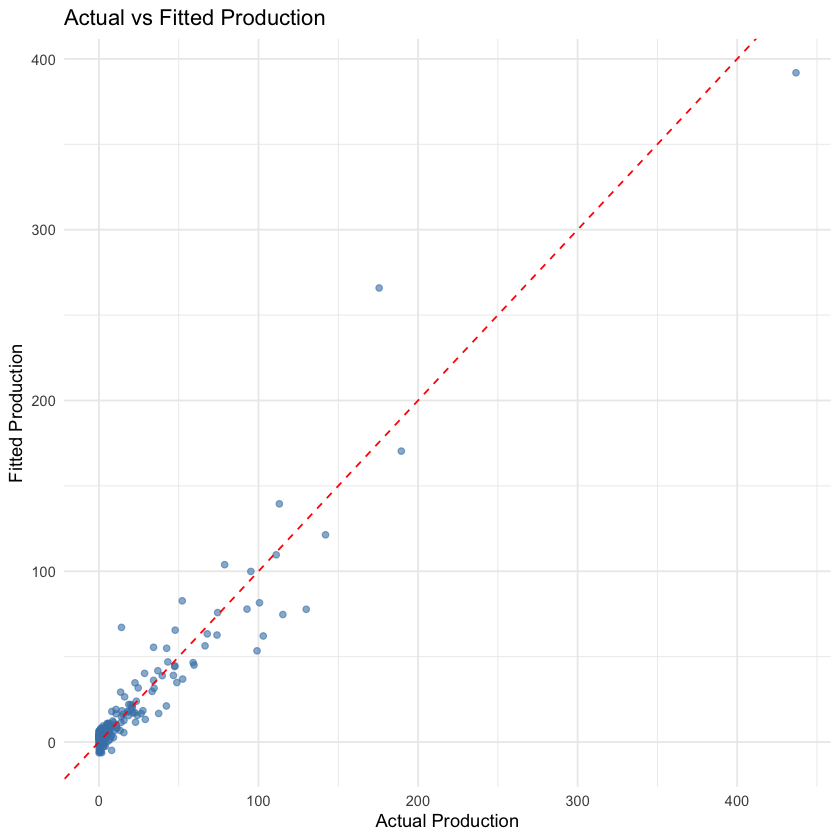

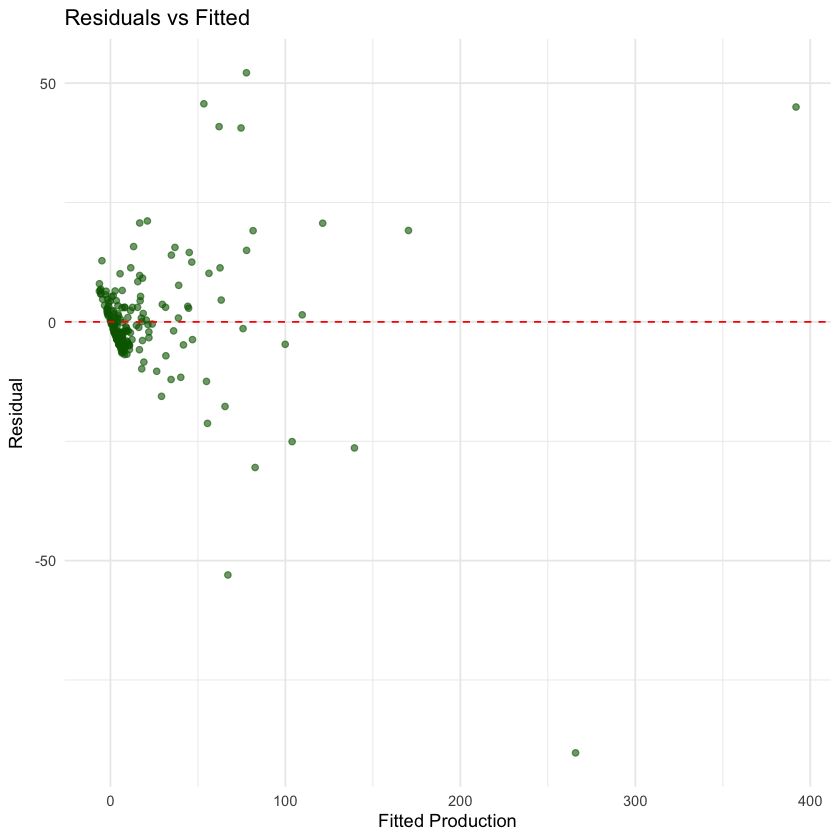

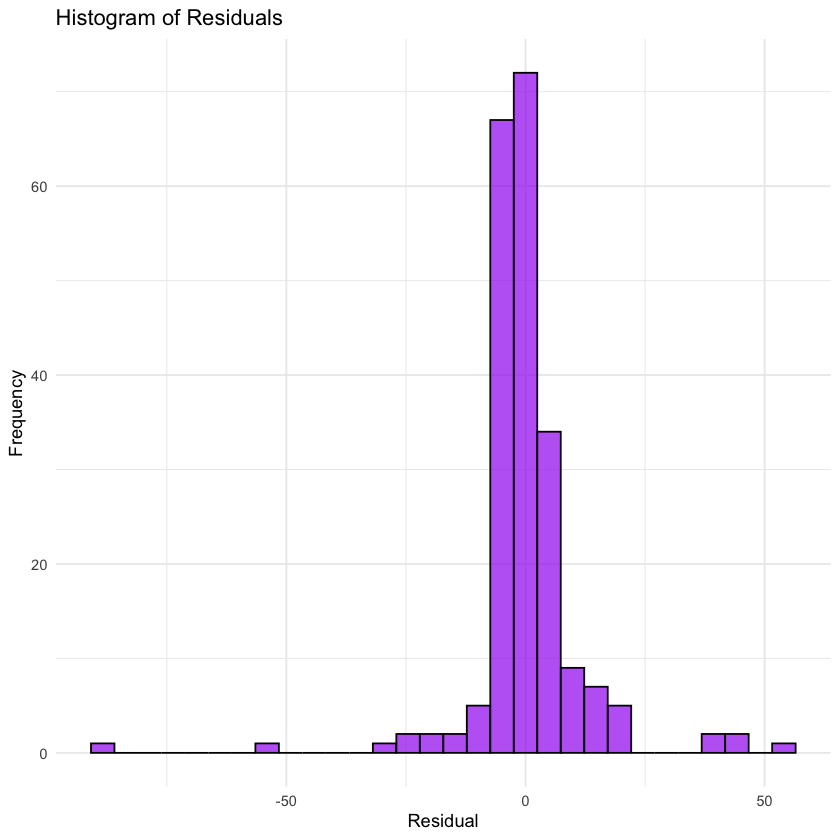

In [2]:


df <- read_csv("./Seasonal_Rf_avg.csv")


df <- df %>%
  rename(
    nitrogen = nitrogenconsumptiontonnes,
    phosphate = phosphateconsumptiontonnes,
    potash = potashconsumptiontonnes
  )


df_clean <- df %>%
  filter(!is.na(production1000tonnes) & 
         !is.na(area1000hectares) &
         !is.na(irrigatedarea1000hectares) & 
         !is.na(nitrogen) &
         !is.na(phosphate) & 
         !is.na(potash) & 
         !is.na(rf) & 
         !is.na(salinity)) %>%
  mutate(
    area_sq = area1000hectares^2,
    irrig_sq = irrigatedarea1000hectares^2,
    nitrogen_sq = nitrogen^2,
    phosphate_sq = phosphate^2,
    potash_sq = potash^2,
    rf_sq = rf^2,
    salinity_sq = salinity^2
  )


model <- lm(
  production1000tonnes ~ area1000hectares + area_sq +
    irrigatedarea1000hectares + irrig_sq +
    nitrogen + nitrogen_sq +
    phosphate + phosphate_sq +
    potash + potash_sq +
    rf + rf_sq +
    salinity + salinity_sq,
  data = df_clean
)
summary(model)

df_clean$fitted <- fitted(model)
df_clean$residuals <- resid(model)


ggplot(df_clean, aes(x = production1000tonnes, y = fitted)) +
  geom_point(alpha = 0.6, color = "steelblue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  labs(
    title = "Actual vs Fitted Production",
    x = "Actual Production",
    y = "Fitted Production"
  ) +
  theme_minimal()


ggplot(df_clean, aes(x = fitted, y = residuals)) +
  geom_point(alpha = 0.6, color = "darkgreen") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(
    title = "Residuals vs Fitted",
    x = "Fitted Production",
    y = "Residual"
  ) +
  theme_minimal()


ggplot(df_clean, aes(x = residuals)) +
  geom_histogram(bins = 30, fill = "purple", alpha = 0.7, color = "black") +
  labs(
    title = "Histogram of Residuals",
    x = "Residual",
    y = "Frequency"
  ) +
  theme_minimal()

## Q7

Input complementarity means inputs work better together than separately.

We can check this in two ways: First combining all the fertilizers in a single variable and making it a regressor and then doing regression analysis. Second, checking for each fertilizer, i.e., making each one of them as a regressor and then doing analysis with irrigated area.

Going ahead with the second option in order to check for each fertilizer and know how each one of them performs with irrigation.

To check the input complementarity, we will make the null hypothesis for eachfertilizer_irrigated as 0 i.e., no complementarity between that fertilizer and irrigation. And also, check the coefficients for it, if it is > 0 then they work together effectively, if not then negatively.

**Quadratic Production Function**
```
production1000tonnes ~ nitrogen + nitrogen_sq + phosphate + phosphate_sq + potash +
potash_sq+ irrigatedarea1000hectares + irrigated_sq + nitrogen_irrigated + phosphate_irrigated
+ potash_irrigated + area1000hectares + area_sq
```

**OLS Regression Results**

| Variable | t calculated/statistical | t critical | Result |
|----------|-------------------------|------------|--------|
| nitrogen_irrigated | 5.091 | > 1.6525 | Reject Ho |
| phosphate_irrigated | -4.939 | > -1.6525 | Reject Ho |
| potash_irrigated | 0.510 | < 1.6525 | Fail to reject Ho |

Doing t test at significance level 5% (α = 0.05)
- dof = 213 - 13 - 1 = 199
- t critical (one-tailed, right) = 1.6525

**1. Nitrogen × Irrigation Interaction**  
**Ho (Null Hypothesis):** β nitrogen_irrigated = 0  
(No complementarity — irrigation has no effect on nitrogen's effectiveness)  
**Hα (Alternative Hypothesis):** β nitrogen_irrigated > 0  
(Complementarity — irrigation enhances the effectiveness of nitrogen)

For nitrogen_irrigated, it is statistically significant by t-test and we reject our null hypothesis which states no complementarity i.e., complementarity is there and also p-value = 0.000 < (α = 0.05) further ensures it, moreover its coefficient is 0.0001 which is practically significant and also > 0 so they both work together.

**2. Phosphate × Irrigation Interaction**  
**Ho (Null Hypothesis):** β phosphate_irrigated = 0  
(No complementarity — irrigation has no effect on phosphate's effectiveness)  
**Hα (Alternative Hypothesis):** β phosphate_irrigated > 0  
(Complementarity — irrigation enhances the effectiveness of phosphate)

For phosphate_irrigated, t calculated = -4.939 which is out of range of t critical value (±1.6525) which makes it statistically significant. But, the coefficient of this is < 0 from OLS regression result which means they do not work together.

**3. Potash × Irrigation Interaction**  
**Ho (Null Hypothesis):** β potash_irrigated = 0  
(No complementarity — irrigation has no effect on potash's effectiveness)  
**Hα (Alternative Hypothesis):** β potash_irrigated > 0  
(Complementarity — irrigation enhances the effectiveness of potash)

For potash_irrigated, t calculated = 0.510 < t critical value 1.6525, failing to reject Ho which makes it statistically insignificant.

**Summary**  
Seeing the results for the test above, we can conclude that Nitrogen × Irrigation Interaction works together effectively i.e., input complementarity is true for it.

In [3]:

df <- read_csv("./Seasonal_Rf_avg.csv")


df <- df %>%
  rename(
    nitrogen = nitrogenconsumptiontonnes,
    phosphate = phosphateconsumptiontonnes,
    potash = potashconsumptiontonnes
  )


df <- df %>%
  mutate(
    nitrogen_sq = nitrogen^2,
    phosphate_sq = phosphate^2,
    potash_sq = potash^2,
    irrigated_sq = irrigatedarea1000hectares^2,
    area_sq = area1000hectares^2,

    
    nitrogen_irrigated = nitrogen * irrigatedarea1000hectares,
    phosphate_irrigated = phosphate * irrigatedarea1000hectares,
    potash_irrigated = potash * irrigatedarea1000hectares
  )


model <- lm(
  production1000tonnes ~ nitrogen + nitrogen_sq +
    phosphate + phosphate_sq +
    potash + potash_sq +
    irrigatedarea1000hectares + irrigated_sq +
    nitrogen_irrigated + phosphate_irrigated + potash_irrigated +
    area1000hectares + area_sq,
  data = df
)

summary(model)

Rows: 213 Columns: 14
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (3): crop, state, district
dbl (11): area1000hectares, production1000tonnes, irrigatedarea1000hectares,...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



Call:
lm(formula = production1000tonnes ~ nitrogen + nitrogen_sq + 
    phosphate + phosphate_sq + potash + potash_sq + irrigatedarea1000hectares + 
    irrigated_sq + nitrogen_irrigated + phosphate_irrigated + 
    potash_irrigated + area1000hectares + area_sq, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.192  -2.967  -1.036   2.534  52.632 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                2.963e+00  1.769e+00   1.675   0.0955 .  
nitrogen                  -4.012e-05  8.507e-05  -0.472   0.6377    
nitrogen_sq                1.671e-10  3.866e-10   0.432   0.6662    
phosphate                  2.012e-04  2.051e-04   0.981   0.3278    
phosphate_sq              -3.754e-09  2.272e-09  -1.652   0.1001    
potash                    -4.241e-04  1.789e-04  -2.370   0.0187 *  
potash_sq                  5.956e-09  3.192e-09   1.866   0.0635 .  
irrigatedarea1000hectares -1.285e-01  1.365e+00  -0.094   0.9251

## Q8 (Part B)

Rows: 213 Columns: 14
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (3): crop, state, district
dbl (11): area1000hectares, production1000tonnes, irrigatedarea1000hectares,...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


 F-test: Do regional differences matter in the Quadratic Production Function?
Analysis of Variance Table

Model 1: production1000tonnes ~ area1000hectares + area_sq + irrigatedarea1000hectares + 
    irrig_sq + nitrogen + nitrogen_sq + phosphate + phosphate_sq + 
    potash + potash_sq + rf + rf_sq + salinity + salinity_sq
Model 2: production1000tonnes ~ (area1000hectares + area_sq + irrigatedarea1000hectares + 
    irrig_sq + nitrogen + nitrogen_sq + phosphate + phosphate_sq + 
    potash + potash_sq + rf + rf_sq + salinity + salinity_sq) * 
    region_group
  Res.Df   RSS Df Sum of Sq      F    Pr(>F)    
1    196 31603                                  
2    128 10501 68     21103 3.7829 4.488e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Quadratic Production Function: With Region Interactions


Table: Quadratic Production Function (Region-Specific Effects)

|term                                            |   estimate|  std.error| statistic| p.value|  

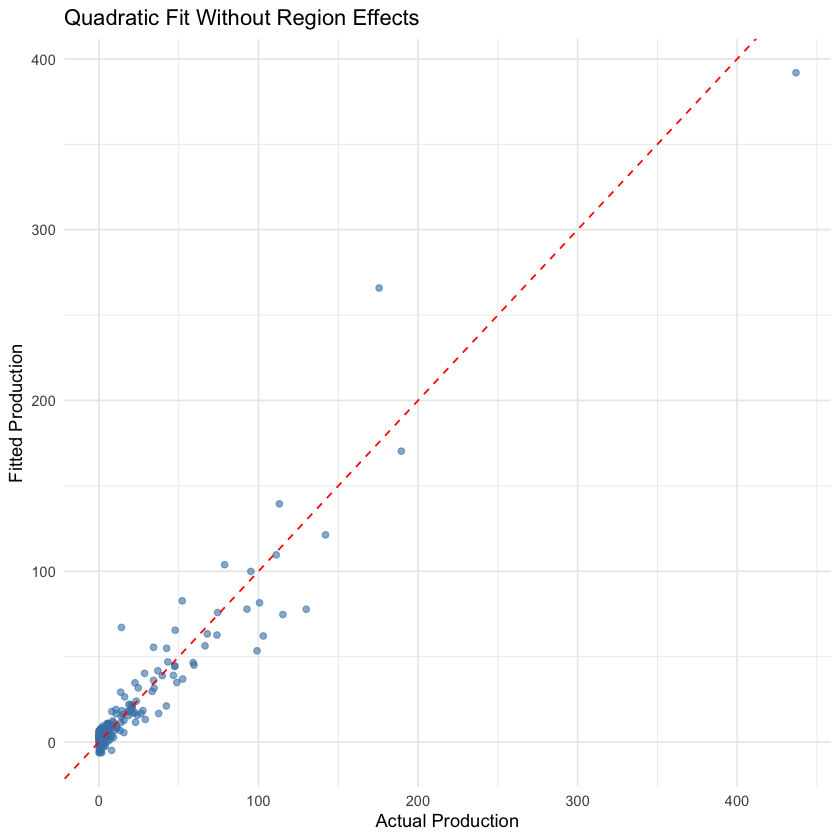

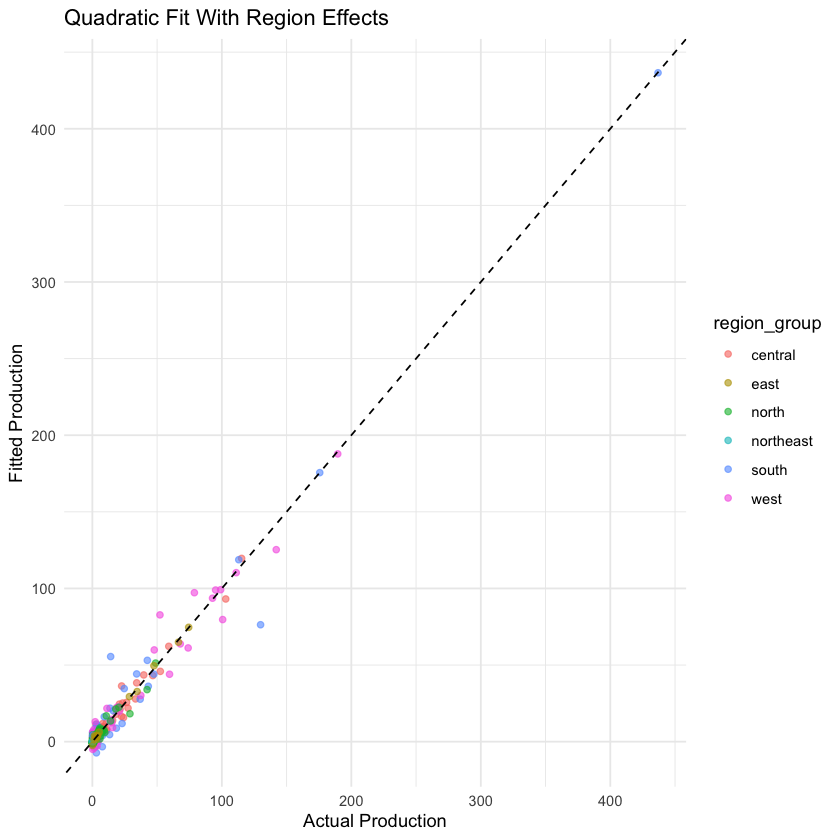

In [7]:
library(broom)
library(knitr)

df <- read_csv("./Seasonal_Rf_avg.csv")

df <- df %>%
  rename(
    nitrogen = nitrogenconsumptiontonnes,
    phosphate = phosphateconsumptiontonnes,
    potash = potashconsumptiontonnes
  )

df$state <- str_to_lower(str_trim(df$state))


region_groups <- list(
  north = c("punjab", "haryana", "uttarakhand", "delhi", "rajasthan", "uttar pradesh"),
  south = c("andhra pradesh", "telangana", "tamil nadu", "karnataka", "kerala"),
  east = c("odisha", "west bengal", "bihar", "jharkhand", "sikkim", "andaman and nicobar islands"),
  west = c("gujarat", "maharashtra", "goa"),
  central = c("madhya pradesh", "chhattisgarh"),
  northeast = c("assam", "manipur", "meghalaya", "mizoram", "nagaland", "tripura", "arunachal pradesh")
)

state_to_region_group <- unlist(lapply(names(region_groups), function(region) {
  setNames(rep(region, length(region_groups[[region]])), region_groups[[region]])
}))
df$region_group <- state_to_region_group[df$state]
df$region_group <- factor(df$region_group)


vars_needed <- c(
  "production1000tonnes", "area1000hectares", "irrigatedarea1000hectares",
  "nitrogen", "phosphate", "potash", "rf", "salinity", "region_group"
)

df_clean <- df %>%
  filter(!is.na(region_group)) %>%
  filter(if_all(all_of(vars_needed), ~ !is.na(.))) %>%
  mutate(
    area_sq = area1000hectares^2,
    irrig_sq = irrigatedarea1000hectares^2,
    nitrogen_sq = nitrogen^2,
    phosphate_sq = phosphate^2,
    potash_sq = potash^2,
    rf_sq = rf^2,
    salinity_sq = salinity^2
  )


model_uniform <- lm(
  production1000tonnes ~ area1000hectares + area_sq +
    irrigatedarea1000hectares + irrig_sq +
    nitrogen + nitrogen_sq +
    phosphate + phosphate_sq +
    potash + potash_sq +
    rf + rf_sq +
    salinity + salinity_sq,
  data = df_clean
)

model_with_regions <- lm(
  production1000tonnes ~ (
    area1000hectares + area_sq +
    irrigatedarea1000hectares + irrig_sq +
    nitrogen + nitrogen_sq +
    phosphate + phosphate_sq +
    potash + potash_sq +
    rf + rf_sq +
    salinity + salinity_sq
  ) * region_group,
  data = df_clean
)


cat(" F-test: Do regional differences matter in the Quadratic Production Function?\n")
anova_result <- anova(model_uniform, model_with_regions)
print(anova_result)


cat("\n Quadratic Production Function: With Region Interactions\n")
tidy_regions <- tidy(model_with_regions, conf.int = TRUE) %>%
  mutate(across(where(is.numeric), ~ round(., 4)))
print(kable(tidy_regions, caption = "Quadratic Production Function (Region-Specific Effects)"))

cat("\n Quadratic Production Function: Without Region Effects\n")
tidy_uniform <- tidy(model_uniform, conf.int = TRUE) %>%
  mutate(across(where(is.numeric), ~ round(., 4)))
print(kable(tidy_uniform, caption = "Quadratic Production Function (No Region Effects)"))


cat("\n\n Model Fit Stats — No Region Effects:\n")
print(round(glance(model_uniform)[, c("r.squared", "adj.r.squared", "statistic", "p.value", "AIC", "BIC")], 4))

cat("\nModel Fit Stats — With Region Interactions:\n")
print(round(glance(model_with_regions)[, c("r.squared", "adj.r.squared", "statistic", "p.value", "AIC", "BIC")], 4))


df_clean$pred_uniform <- fitted(model_uniform)
df_clean$pred_regions <- fitted(model_with_regions)

ggplot(df_clean, aes(x = production1000tonnes, y = pred_uniform)) +
  geom_point(alpha = 0.6, color = "steelblue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  labs(
    title = "Quadratic Fit Without Region Effects",
    x = "Actual Production",
    y = "Fitted Production"
  ) +
  theme_minimal()

ggplot(df_clean, aes(x = production1000tonnes, y = pred_regions, color = region_group)) +
  geom_point(alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "black") +
  labs(
    title = "Quadratic Fit With Region Effects",
    x = "Actual Production",
    y = "Fitted Production"
  ) +
  theme_minimal()

## Q8 (Part A)

Rows: 213 Columns: 14
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (3): crop, state, district
dbl (11): area1000hectares, production1000tonnes, irrigatedarea1000hectares,...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


 F-test: Do region-specific input effects improve model fit?
Analysis of Variance Table

Model 1: log_production ~ log_area + log_fertilizer + log_irrigated + 
    log_unirrigated + rf + salinity
Model 2: log_production ~ (log_area + log_fertilizer + log_irrigated + 
    log_unirrigated + rf + salinity) * region_group
  Res.Df    RSS Df Sum of Sq      F    Pr(>F)    
1    204 41.104                                  
2    169 28.488 35    12.617 2.1385 0.0007445 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Cobb-Douglas Without Region Effects




Table: Cobb-Douglas Production Function (No Region Effects)

|term            | estimate| std.error| statistic| p.value| conf.low| conf.high|
|:---------------|--------:|---------:|---------:|-------:|--------:|---------:|
|(Intercept)     |   0.2696|    0.3011|    0.8952|  0.3717|  -0.3242|    0.8633|
|log_area        |   1.0287|    0.0453|   22.7178|  0.0000|   0.9394|    1.1179|
|log_fertilizer  |  -0.0143|    0.0256|   -0.5586|  0.5771|  -0.0648|    0.0362|
|log_irrigated   |   0.0106|    0.0620|    0.1704|  0.8649|  -0.1118|    0.1329|
|log_unirrigated |  -0.0402|    0.0638|   -0.6308|  0.5289|  -0.1660|    0.0855|
|rf              |  -0.0012|    0.0003|   -4.2674|  0.0000|  -0.0017|   -0.0006|
|salinity        |   0.0014|    0.0017|    0.8313|  0.4067|  -0.0020|    0.0049|



Cobb-Douglas With Region Interactions




Table: Cobb-Douglas Production Function with Region-Specific Effects

|term                                  | estimate| std.error| statistic| p.value| conf.low| conf.high|
|:-------------------------------------|--------:|---------:|---------:|-------:|--------:|---------:|
|(Intercept)                           |   0.5464|    1.3744|    0.3976|  0.6914|  -2.1668|    3.2596|
|log_area                              |   0.7218|    0.2092|    3.4502|  0.0007|   0.3088|    1.1348|
|log_fertilizer                        |  -0.2048|    0.1112|   -1.8420|  0.0672|  -0.4242|    0.0147|
|log_irrigated                         |   0.2165|    0.2615|    0.8278|  0.4090|  -0.2998|    0.7327|
|log_unirrigated                       |   0.4704|    0.2905|    1.6195|  0.1072|  -0.1030|    1.0438|
|rf                                    |   0.0071|    0.0031|    2.3023|  0.0225|   0.0010|    0.0133|
|salinity                              |   0.0201|    0.0296|    0.6799|  0.4975|  -0.0383|    0.0786|
|



 Model Fit Stats (Plain Model):
# A tibble: 1 x 6
  r.squared adj.r.squared statistic p.value   AIC   BIC
      <dbl>         <dbl>     <dbl>   <dbl> <dbl> <dbl>
1     0.958         0.957      773.       0  270.  296.

 Model Fit Stats (Region Interaction Model):
# A tibble: 1 x 6
  r.squared adj.r.squared statistic p.value   AIC   BIC
      <dbl>         <dbl>     <dbl>   <dbl> <dbl> <dbl>
1     0.971         0.964      137.       0  262.  406.


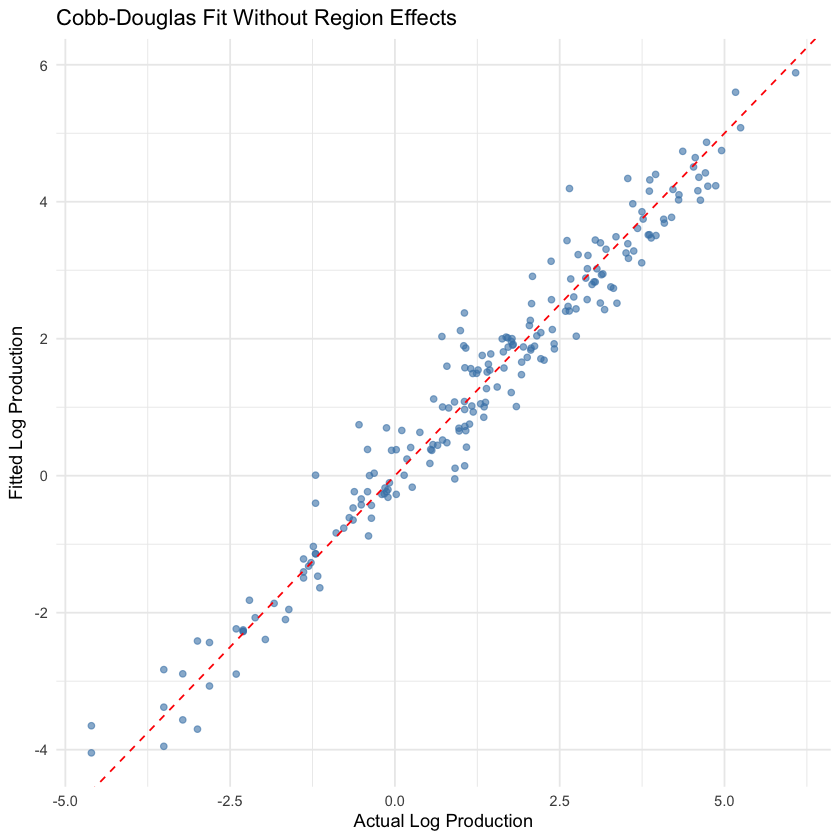

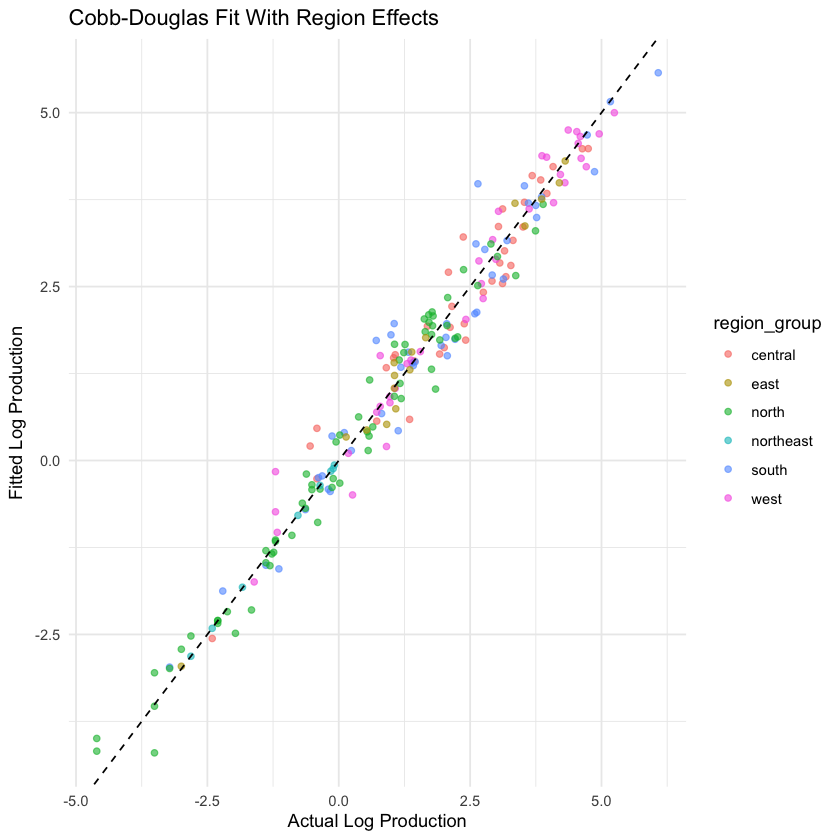

In [8]:
library(broom)
library(knitr)



df <- read_csv("./Seasonal_Rf_avg.csv")

df <- df %>%
  rename(
    nitrogen = nitrogenconsumptiontonnes,
    phosphate = phosphateconsumptiontonnes,
    potash = potashconsumptiontonnes
  )

df$state <- str_to_lower(str_trim(df$state))


region_groups <- list(
  north = c("punjab", "haryana", "uttarakhand", "delhi", "rajasthan", "uttar pradesh"),
  south = c("andhra pradesh", "telangana", "tamil nadu", "karnataka", "kerala"),
  east = c("odisha", "west bengal", "bihar", "jharkhand"),
  west = c("gujarat", "maharashtra", "goa"),
  central = c("madhya pradesh", "chhattisgarh"),
  northeast = c("assam", "manipur", "meghalaya", "mizoram", "nagaland", "tripura", "arunachal pradesh", "sikkim")
)

state_to_region_group <- unlist(lapply(names(region_groups), function(region) {
  setNames(rep(region, length(region_groups[[region]])), region_groups[[region]])
}))
df$region_group <- state_to_region_group[df$state]
df$region_group <- factor(df$region_group)


vars_needed <- c(
  "production1000tonnes", "area1000hectares", "irrigatedarea1000hectares",
  "nitrogen", "phosphate", "potash", "rf", "salinity", "region_group"
)

df_clean <- df %>%
  filter(!is.na(region_group)) %>%
  filter(if_all(all_of(vars_needed), ~ !is.na(.))) %>%
  mutate(
    unirrigated_area = area1000hectares - irrigatedarea1000hectares,
    total_fertilizer = nitrogen + phosphate + potash,
    irrigated_plus1 = irrigatedarea1000hectares + 1,
    unirrigated_plus1 = unirrigated_area + 1,
    log_production = log(production1000tonnes),
    log_area = log(area1000hectares),
    log_fertilizer = log(total_fertilizer),
    log_irrigated = log(irrigated_plus1),
    log_unirrigated = log(unirrigated_plus1)
  )


model_cobb_plain <- lm(
  log_production ~ log_area + log_fertilizer + log_irrigated + log_unirrigated + rf + salinity,
  data = df_clean
)

model_cobb_region <- lm(
  log_production ~ (log_area + log_fertilizer + log_irrigated + log_unirrigated + rf + salinity) * region_group,
  data = df_clean
)


cat(" F-test: Do region-specific input effects improve model fit?\n")
anova_result <- anova(model_cobb_plain, model_cobb_region)
print(anova_result)


cat("\n Cobb-Douglas Without Region Effects\n")
tidy(model_cobb_plain, conf.int = TRUE) %>%
  mutate(across(where(is.numeric), ~ round(., 4))) %>%
  kable(caption = "Cobb-Douglas Production Function (No Region Effects)")

cat("\n\nCobb-Douglas With Region Interactions\n")
tidy(model_cobb_region, conf.int = TRUE) %>%
  mutate(across(where(is.numeric), ~ round(., 4))) %>%
  kable(caption = "Cobb-Douglas Production Function with Region-Specific Effects")


cat("\n\n Model Fit Stats (Plain Model):\n")
print(round(glance(model_cobb_plain)[, c("r.squared", "adj.r.squared", "statistic", "p.value", "AIC", "BIC")], 4))

cat("\n Model Fit Stats (Region Interaction Model):\n")
print(round(glance(model_cobb_region)[, c("r.squared", "adj.r.squared", "statistic", "p.value", "AIC", "BIC")], 4))


df_clean$pred_no_region <- fitted(model_cobb_plain)
df_clean$pred_with_region <- fitted(model_cobb_region)


ggplot(df_clean, aes(x = log_production, y = pred_no_region)) +
  geom_point(alpha = 0.6, color = "steelblue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  labs(
    title = "Cobb-Douglas Fit Without Region Effects",
    x = "Actual Log Production",
    y = "Fitted Log Production"
  ) +
  theme_minimal()


ggplot(df_clean, aes(x = log_production, y = pred_with_region, color = region_group)) +
  geom_point(alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "black") +
  labs(
    title = "Cobb-Douglas Fit With Region Effects",
    x = "Actual Log Production",
    y = "Fitted Log Production"
  ) +
  theme_minimal()